In [12]:
import math
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt


# Step 1: Calculate x, y

mass_start = 0.8 * 2.0e30   # Starting mass
mass_stop = 1.4 * 2.0e30    # Ending mass
#mass_step = 0.1 * 2.0e30    # Mass increment

#masses = np.arange(mass_start, mass_stop, mass_step)  # List of masses

energy_start = 10**43       # Staring energy
energy_stop = 10**44         # Ending energy
#energy_step = 1*(10**43)    # Energy increment

#energy = np.arange(energy_start,  energy_end, energy_step)  # List of Energy

time_start = 0.1   # Starting time
time_stop = 40     # Ending time
time_step = 0.1    # Time increment

time = np.arange(time_start, time_stop, time_step)     # List of time


x = []
y = []


nickel = 7.605*(10**5)  # Nickel
b = 13.7        # 
k = 0.02      # Kinetic Energy 
c = 3 * 10**8    # Speed of Light



def calcualte(m,e):
    data={}
    to = (k * m) / (b * c)
    vsc = math.sqrt(2 * e / m)
    th = 1 / vsc
    tm = math.sqrt(2 * (to * th))
    for t in time:
        time_original = t
        t = t * 24 * 60 * 60  # convert days to seconds
        x_val = t / tm
        y_val = tm / (2 * nickel)


        result = integrate.quad(
            lambda z, y: np.exp(-2 * z * y + z ** 2) * 2 * z, 0, x_val, args=(y_val,)
        )[0]
        result *= np.exp(-x_val ** 2)  # multiply by e^-x^2
        data[time_original]=result

    return data
data1=calcualte(mass_start,energy_start)
# Step 2: Extract time and result values
time_original_values_1 = list(data1.keys())
result_values_1 = list(data1.values())


data2=calcualte(mass_stop,energy_stop)
# Step 2: Extract time and result values
time_original_values_2 = list(data2.keys())
result_values_2 = list(data2.values())

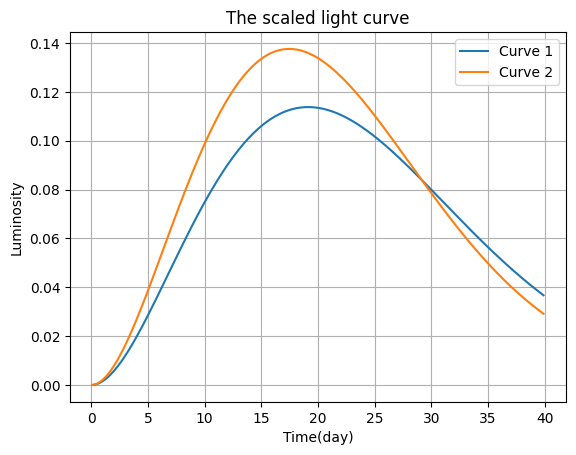

In [23]:
# Plot the graph with multiple curves
plt.plot(time_original_values_1, result_values_1, label='Curve 1')
plt.plot(time_original_values_2, result_values_2, label='Curve 2')

plt.xlabel("Time(day)")
plt.ylabel("Luminosity")
plt.title("The scaled light curve")


# Add a legend to differentiate the curves
plt.legend()

# Save the graph as JPEG
plt.savefig("light_curve.jpeg")
# Show the graph
plt.show()


